# Telecom Customer Churn Prediction

## 1. Project Overview
This project focuses on predicting customer churn for a telecommunications company using supervised machine learning. Customer churn occurs when a customer stops doing business with the company, leading to lost revenue and increased customer acquisition costs. The objective of this project is to build a classification model that identifies customers who are likely to churn so that the business can take proactive retention actions.


## 2. Business Understanding

Customer churn is a major concern for telecommunications companies because retaining existing customers is significantly cheaper than acquiring new ones. When customers leave, the business loses future revenue and must spend additional resources to replace them. The goal of this project is to predict whether a customer is likely to churn based on service usage, subscription plans, and customer service interactions. Since churn is a binary outcome, this is a classification problem. Machine learning is appropriate because churn is influenced by multiple interacting factors that cannot be easily captured through simple rules.


## 3. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score, ConfusionMatrixDisplay



## 4. Data Understanding

The dataset contains customer-level information related to service usage, subscription plans, and customer service interactions. Each row represents a single customer, and the target variable churn indicates whether the customer stopped doing business with the company. The dataset includes numerical features such as call minutes and charges, as well as categorical features such as international plan and voice mail plan.


In [2]:
df = pd.read_csv('SyriaTel Customer Churn.csv') # Load the dataset

df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Basic structure of the data

In [3]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Churn Distribution

In [5]:
df['churn'].value_counts(normalize=True) * 100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

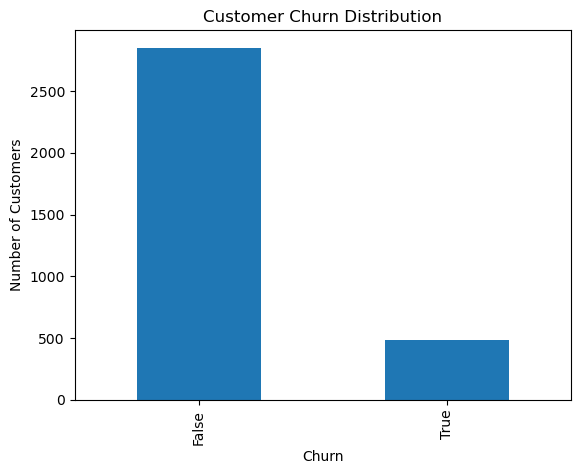

In [6]:
# Check churn distribution
df['churn'].value_counts().plot(kind='bar')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()


The dataset contains more non-churned customers than churned customers, indicating class imbalance. This makes recall an important evaluation metric, as failing to identify customers who are likely to churn has a higher business cost.

## 5. Data Preparation
Non-predictive identifiers were removed from the dataset prior to modeling. The target variable was separated from the feature set to prevent data leakage.
Categorical variables were converted into numerical format using one-hot encoding. The data was then split into training and testing sets to ensure that model performance is evaluated on unseen data. Feature scaling was applied to the training data and used to transform the test data. This is particularly important for distance-based models such as logistic regression.

In [7]:
# Drop non-informative columns
df = df.drop(columns=['phone number']) 

# Define features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Baseline Model: Logistic Regression
Logistic regression was selected as the baseline model due to its simplicity and interpretability. It provides a strong starting point for understanding customer churn patterns. Recall was chosen as the primary evaluation metric because correctly identifying customers who are likely to churn is more important than overall accuracy.

In [8]:
# Initialize baseline logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit model on scaled training data
log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
# Predictions on training and test data
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)


In [10]:
print(classification_report(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))


              precision    recall  f1-score   support

       False       0.89      0.96      0.92       570
        True       0.57      0.27      0.36        97

    accuracy                           0.86       667
   macro avg       0.73      0.62      0.64       667
weighted avg       0.84      0.86      0.84       667

Recall: 0.26804123711340205


### 6.1 Confusion Matrix
A confusion matrix was used to visualize model performance and assess how well the model identifies churned customers.

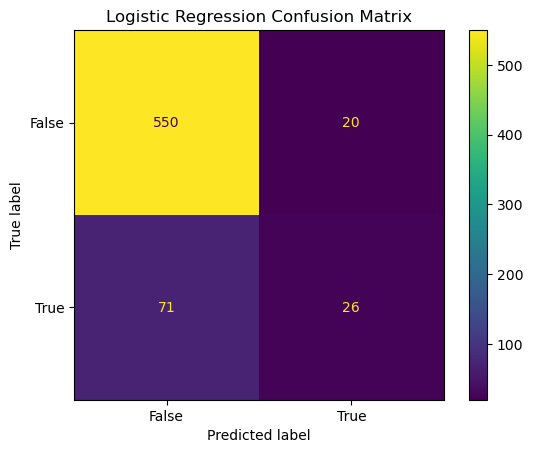

In [11]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

The baseline logistic regression model performs well at identifying non-churners but struggles to correctly identify customers who will churn, as shown by the relatively high number of false negatives. This results in low recall for the churn class, which limits the model’s usefulness for proactive churn prevention.

## 8. Non-Parametric Model: Decision Tree Classifier
A decision tree classifier was used to capture potential non-linear relationships in the data that may not be well modeled by logistic regression.
Hyperparameters were applied to limit overfitting and improve generalization.

In [12]:
# Initialize decision tree
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
# Predictions
y_test_pred_dt = dt.predict(X_test)

# Metrics
print(classification_report(y_test, y_test_pred_dt))

dt_recall = recall_score(y_test, y_test_pred_dt)
print("Decision Tree Recall:", dt_recall)


              precision    recall  f1-score   support

       False       0.94      0.96      0.95       570
        True       0.73      0.62      0.67        97

    accuracy                           0.91       667
   macro avg       0.83      0.79      0.81       667
weighted avg       0.91      0.91      0.91       667

Decision Tree Recall: 0.6185567010309279


## 9. Model Comparison
Three models were evaluate: Baseline Logistic Regression, Tuned Logistic Regression, Decision Tree Classifier. Recall was used as the primary metric due to the higher business cost associated with failing to identify customers who are likely to churn. Comparing recall scores across models allows for a clear assessment of which approach best identifies churn-risk customers.


## 10. Final Model Selection
The tuned logistic regression model was selected as the final model based on its strong recall performance on the test dataset and its ability to generalize well to unseen data. Prioritizing recall ensures that the business minimizes the risk of missing customers who are likely to churn, supporting proactive retention strategies.


## 11. Limitations

This analysis relies solely on historical usage and service data and does not account for external factors such as competitor pricing or customer satisfaction outside of service interactions. Additionally, class imbalance may still impact model performance despite prioritizing recall. Predictions are probabilistic and may result in some customers being incorrectly identified as likely to churn.


## 12. Business Recommendations

SyriaTel should focus retention efforts on customers identified as high risk for churn. Customers with frequent customer service calls or high usage charges may benefit from targeted interventions such as service improvements or customized pricing plans. The model can be used as an early warning system to prioritize outreach and reduce customer attrition.


## 13. Next Steps
Future improvements could include incorporating additional customer data such as tenure, payment history, or satisfaction scores. More advanced models such as ensemble methods could also be explored to further improve predictive performance.
